In [1]:
import torch
import matplotlib.pyplot as plt
from torch import nn
import torch.nn.functional as F
from torchvision import transforms, datasets

# MNIST example from scratch

## Read files into numpy array and plot

['../../data/MNIST/original/train-labels-idx1-ubyte', '../../data/MNIST/original/t10k-images-idx3-ubyte', '../../data/MNIST/original/t10k-labels-idx1-ubyte', '../../data/MNIST/original/train-images-idx3-ubyte']
60000 labels with shape of (1,), Output shape: (60000, 1)
60000 images with shape of (28, 28), Output shape: (60000, 1, 28, 28)
10000 labels with shape of (1,), Output shape: (10000, 1)
10000 images with shape of (28, 28), Output shape: (10000, 1, 28, 28)


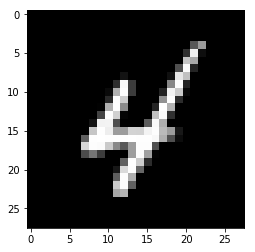

label: [4]


In [11]:
import glob
files = glob.glob("../../data/MNIST/original/**")
assert (len(files)==4), "4 Files are required"
print(files)

import struct
import numpy as np


def readImages(filePath):
    with open(filePath, 'rb') as f:
        struct.unpack('>i',f.read(4))[0]
        n_images = struct.unpack('>i',f.read(4))[0] 
        n_rows = struct.unpack('>i',f.read(4))[0]
        n_cols = struct.unpack('>i',f.read(4))[0]
        images = np.fromfile(f,dtype=np.uint8)
    assert (n_images==images.shape[0]/n_cols/n_rows), "Problem in reading the file. \
    The header of file does not match with its data"
    images = images.reshape(-1,1,n_rows,n_cols)
    print("{n_i} images with shape of {shape}, Output shape: {o_sh}".format(
        n_i = n_images, shape = (n_rows, n_cols), o_sh=images.shape))
    return images

def readLables(filePath):
    with open(filePath, 'rb') as f:
        struct.unpack('>i',f.read(4))[0]
        n_labels = struct.unpack('>i',f.read(4))[0] 
        labels = np.fromfile(f,dtype=np.uint8)
    assert (n_labels==labels.shape[0]), "Problem in reading the file. \
    The header of file does not match with its data"
    labels = labels.reshape(n_labels,-1)
    print("{n_i} labels with shape of {shape}, Output shape: {o_sh}".format(
        n_i = n_labels, shape = labels[0].shape, o_sh = labels.shape))
    return labels

train_labels=readLables(files[0])
train_images=readImages(files[3])
test_labels=readLables(files[2])
test_images=readImages(files[1])

idx = 15347
plt.imshow(train_images[idx,0],cmap='gray')
plt.show()
print ("label:" ,train_labels[idx])

In [14]:
tr = transforms.Compose([transforms.ToTensor(),
                         transforms.Normalize((0.5),(0.5))])

In [15]:
out = tr(train_images)
print(out.shape)

TypeError: pic should be PIL Image or ndarray. Got <class 'numpy.ndarray'>

In [16]:
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [19]:
print(type(trainset))

<class 'torchvision.datasets.mnist.MNIST'>
